## Devanagri Character Dataset

The dataset can be found [here](https://www.kaggle.com/ashokpant/devanagari-character-dataset)

Let's start by importing the stuff we need. Note that this is not intended for any kind of production use. Using * for import is never a good idea except for prototyping

In [1]:
from fastai.vision import *
from fastai.metrics import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The following lines of code expect that the data has been downloaded, extracted and laid out in the required directory structure

In [3]:
path = Path('DevanagariHandwrittenCharacterDataset')
path.ls()

[PosixPath('DevanagariHandwrittenCharacterDataset/Test'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Train'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Valid'),
 PosixPath('DevanagariHandwrittenCharacterDataset/models')]

In [5]:
train = path/'Train'
valid = path/'Valid'

In [6]:
valid.mkdir(parents=True, exist_ok=True)

# Initialize directories for all categories in Train

Make sure to run the below code only once. 

Substitute shutil.copy for os.rename if you want to run this more than once

In [ ]:
for f in train.iterdir():
    path = f.relative_to(train)
    os.mkdir(valid/path)

# Split files into train and validation set

In [11]:
split = 0.2
counter = 1

In [ ]:
for f in train.iterdir():
    n = os.listdir(f)
    len_dir = len(n)
    num_valid = round(split*len_dir)
    valid_img = random.sample(n, num_valid)

    for img in valid_img:
        file = f/img
        path = f.relative_to(train)
        valid_path = valid/path/img
        os.rename(file, valid_path)
        

In [12]:
data = ImageDataBunch.from_folder(path, train='Train', valid='Valid', ds_tfms = get_transforms(do_flip=False), size=28, bs=32)

IndexError: index 0 is out of bounds for axis 0 with size 0

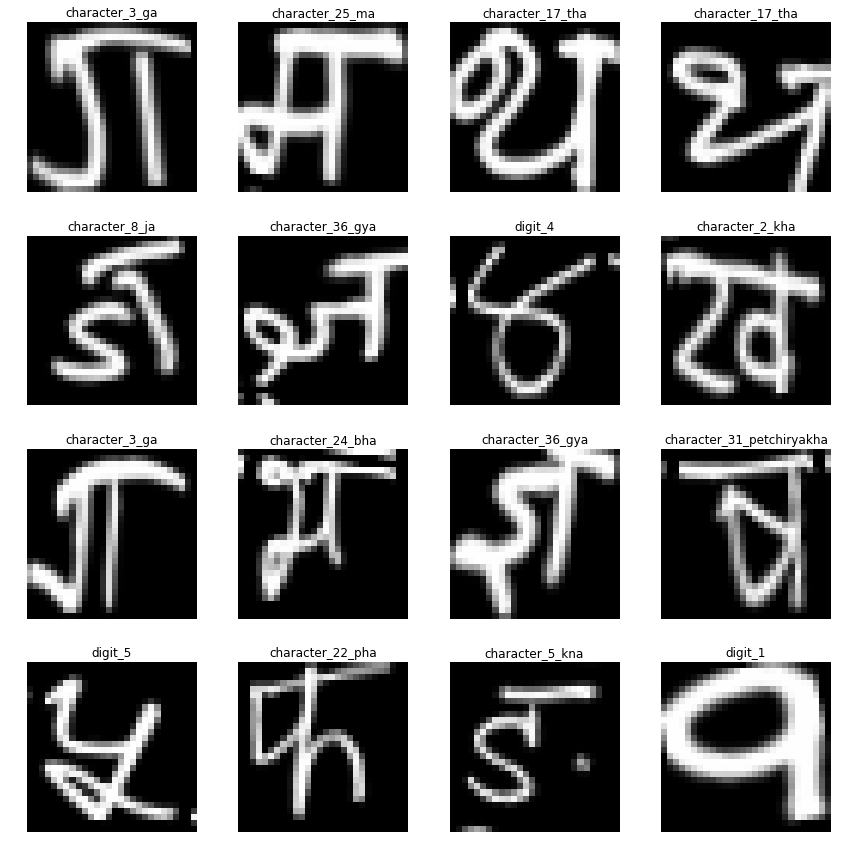

In [66]:
data.show_batch(rows=4, figsize=(12, 12))

In [67]:
print(data.c)

46


In [68]:
print(data.classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [69]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

In [70]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.910540,1.278321,0.371995
2,0.998450,0.518202,0.152110
3,0.664771,0.326138,0.095396
4,0.652688,0.288355,0.084591


In [71]:
learn.save('iter1')

In [72]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.117004,0.050110,0.015345


In [73]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


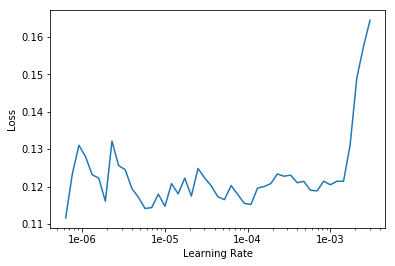

In [74]:
learn.recorder.plot()

In [75]:
learn.load('iter1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (62560 items)
[Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra]...
Path: DevanagariHandwrittenCharacterDataset
x: ImageItemList (62560 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: DevanagariHandwrittenCharacterDataset;

Valid: LabelList
y: CategoryList (15640 items)
[Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra]...
Path: DevanagariHandwrittenCharacterDataset
x: ImageItemList (15640 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: DevanagariHandwrittenCharacterDataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-0

In [76]:
interpret = ClassificationInterpretation.from_learner(learn)

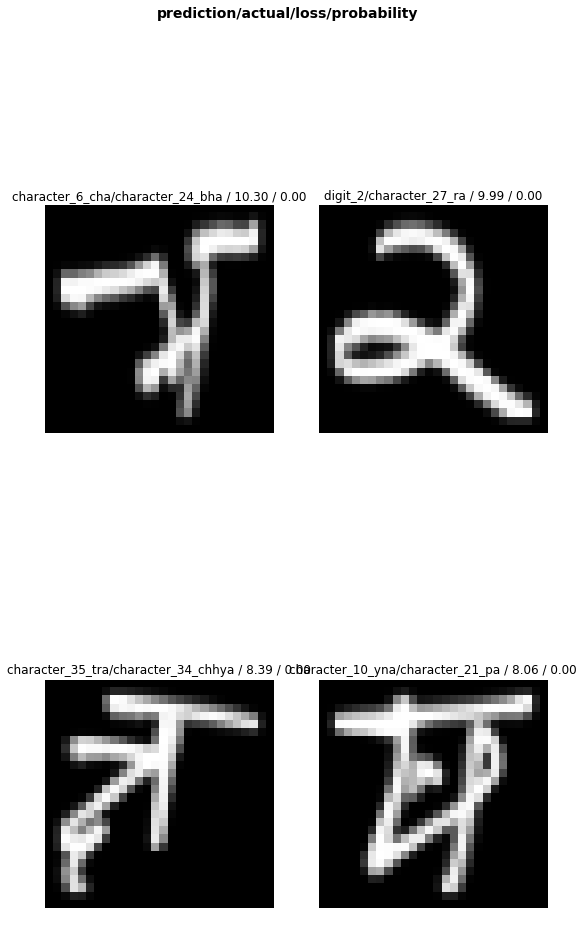

In [78]:
interpret.plot_top_losses(4, figsize=(9, 16))

In [80]:
interpret.most_confused(min_val=10)

[('character_26_yaw', 'character_17_tha', 33),
 ('character_17_tha', 'character_26_yaw', 20),
 ('character_33_ha', 'character_7_chha', 20),
 ('character_14_dhaa', 'character_18_da', 19),
 ('character_17_tha', 'character_19_dha', 19),
 ('character_5_kna', 'character_13_daa', 18),
 ('character_19_dha', 'character_4_gha', 17),
 ('character_23_ba', 'character_29_waw', 16),
 ('character_18_da', 'character_14_dhaa', 15),
 ('character_32_patalosaw', 'character_25_ma', 14),
 ('character_13_daa', 'character_33_ha', 13),
 ('character_24_bha', 'character_10_yna', 13),
 ('character_24_bha', 'character_25_ma', 13),
 ('character_25_ma', 'character_24_bha', 13),
 ('character_7_chha', 'character_33_ha', 13),
 ('character_17_tha', 'character_4_gha', 12),
 ('character_19_dha', 'character_17_tha', 12),
 ('character_28_la', 'character_20_na', 12),
 ('character_29_waw', 'character_23_ba', 12),
 ('character_30_motosaw', 'character_32_patalosaw', 12),
 ('character_4_gha', 'character_19_dha', 12),
 ('characte

In [81]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.285968,0.107667,0.032864
2,0.080484,0.035171,0.010038


In [82]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.070930,0.036484,0.011061
2,0.077017,0.034464,0.010422
3,0.069827,0.034585,0.010806
4,0.056432,0.032979,0.010422


In [83]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.082026,0.035407,0.010806
2,0.067615,0.033603,0.009974
3,0.073542,0.034590,0.010486
4,0.067434,0.034145,0.010550


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


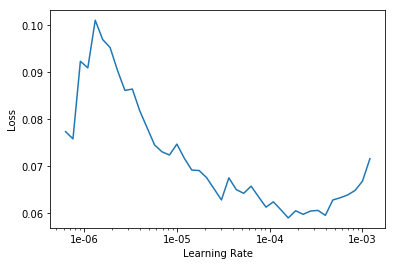

In [85]:
learn.lr_find()
learn.recorder.plot()

In [86]:
learn.save('iter2')

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

In [84]:
data = ImageDataBunch.from_folder(path, train='Train', valid='Valid', ds_tfms = get_transforms(do_flip=False), bs=64, size=32)

In [87]:
learn1 = create_cnn(data, models.resnet50, metrics=error_rate)
learn1.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.741458,1.236389,0.356905
2,0.719188,0.420540,0.129412
3,0.492178,0.253169,0.081266
4,0.423322,0.213777,0.065665


In [88]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


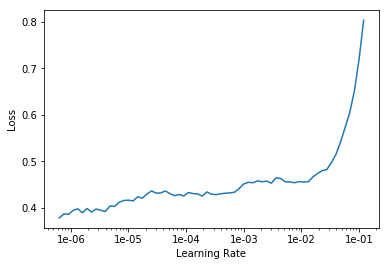

In [89]:
learn1.recorder.plot()

In [90]:
learn1.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.415129,0.211701,0.068223
2,0.339027,0.140375,0.042072
3,0.227547,0.106730,0.032673
4,0.211819,0.099183,0.029987


In [91]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


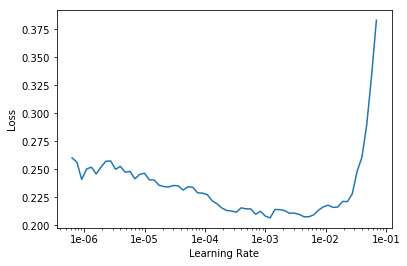

In [92]:
learn1.recorder.plot()

In [93]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.064681,0.032145,0.009399
2,0.068348,0.048641,0.014834
3,0.068569,0.030699,0.009719
4,0.048784,0.034024,0.010358


In [95]:
 learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


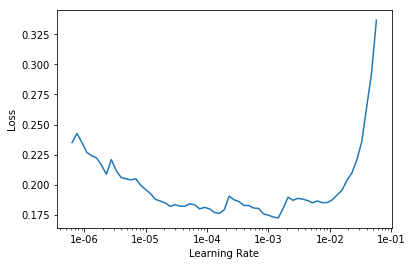

In [96]:
learn1.recorder.plot()

In [97]:
learn1.fit_one_cycle(2, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.200923,0.095067,0.028581
2,0.205198,0.096603,0.029795


In [98]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


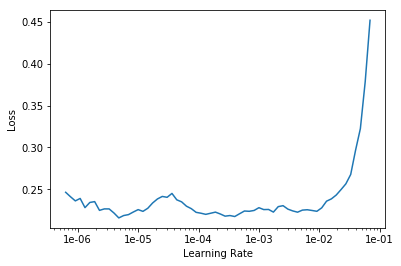

In [99]:
learn1.recorder.plot()

In [100]:
learn1.save('stage1')

In [101]:
learn1.fit_one_cycle(1, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.213008,0.096093,0.028964


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


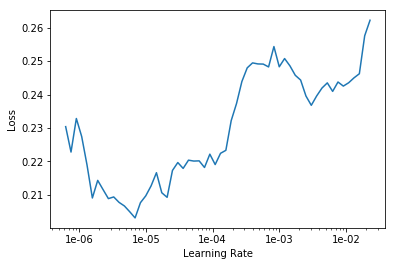

In [102]:
learn1.lr_find()
learn1.recorder.plot()

In [103]:
learn1.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (62560 items)
[Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra]...
Path: DevanagariHandwrittenCharacterDataset
x: ImageItemList (62560 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: DevanagariHandwrittenCharacterDataset;

Valid: LabelList
y: CategoryList (15640 items)
[Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra, Category character_27_ra]...
Path: DevanagariHandwrittenCharacterDataset
x: ImageItemList (15640 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: DevanagariHandwrittenCharacterDataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-0

In [104]:
learn1.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.224736,0.092351,0.029348


That is a pretty good result, considering we've only spent a couple of hours on this. The result above, as you can see is underfitting but in the interest of learning, I'll leave that as an exercise. Good luck!!